<a href="https://colab.research.google.com/github/Dli292/Parallelized-post-processing-code-standard-mechanics-method/blob/main/deep_learning_dense_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

# other packages
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
!pip install comet_ml > /dev/null 2>&1
import comet_ml

COMET_API_KEY = "6dsEilHk4qsDVaI992vpEKndM"

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0
assert COMET_API_KEY != "", "Please insert your Comet API Key"






/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
comet_ml.init(project_name="6S191lab2_part1_NN")
comet_model_1 = comet_ml.Experiment()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: tensorflow, keras.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/dli292/6s191lab2-part1-nn/6824cf73df3848f5905ff6939719b4ed



In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


{'web': 'https://www.comet.com/api/image/download?imageId=9d5c787bdae54d148fffa15f4639ea6b&experimentKey=6824cf73df3848f5905ff6939719b4ed',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=9d5c787bdae54d148fffa15f4639ea6b&experimentKey=6824cf73df3848f5905ff6939719b4ed',
 'imageId': '9d5c787bdae54d148fffa15f4639ea6b'}

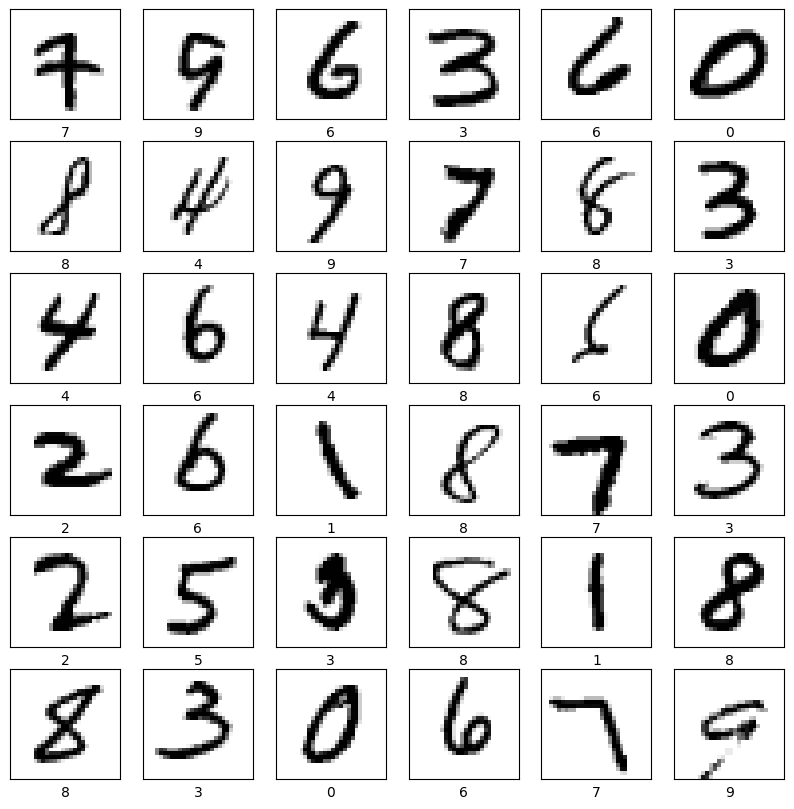

In [5]:


plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])
comet_model_1.log_figure(figure=plt)



In [6]:
def build_fc_model():
  fc_model  = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation = tf.nn.softmax)
  ])
  return fc_model


In [9]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:

model = build_fc_model()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
comet_model_1.end()


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8690 - loss: 0.4190
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9670 - loss: 0.1107
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9767 - loss: 0.0727
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9837 - loss: 0.0517
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9878 - loss: 0.0405


In [17]:
tets_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9686 - loss: 0.1028
Test accuracy: 0.9726999998092651
